<a href="https://colab.research.google.com/github/Nasiru-dsc/Pizza_Sales_Analysis/blob/main/Nasiru's_pizza_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Data Integration
In this section, I am loading the four individual CSV files and merging them into a single master dataframe. This allows for analysis of the sales data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# This is the path to my zip file
zip_path = '/content/drive/MyDrive/TECHCRUSH DATA SCIENCE COHORT 5/DATASETS/Pizza+Place+Sales.zip'

# Extracting the contents directly into Colab
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/pizza_data')



In [ ]:
import pandas as pd

# These paths point to the individual CSVs we just extracted
orders = pd.read_csv('/content/pizza_data/pizza_sales/orders.csv')
order_details = pd.read_csv('/content/pizza_data/pizza_sales/order_details.csv')
pizzas = pd.read_csv('/content/pizza_data/pizza_sales/pizzas.csv')

# Adding encoding for the type names to avoid errors
pizza_types = pd.read_csv('/content/pizza_data/pizza_sales/pizza_types.csv', encoding='unicode_escape')

display(orders.head(3))

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28


## Step 2: Data Cleaning and Pre-processing
To analyze trends over time, I am converting the 'date' column into a datetime object. This step is necessary to extract specific day names and months without causing an AttributeError.

In [ ]:
# Converting the date column from text to proper datetime objects
final_df['date'] = pd.to_datetime(final_df['date'])

## Step 3: Calculating Key Performance Indicators (KPIs)
Here, I am calculating the core metrics for the pizza shop, including Total Revenue, Total Orders, and Average Order Value. These numbers represent the overall health of the business.

In [ ]:
# Step 1:I Join 'order_details' with 'orders' on 'order_id'
# This adds the date and time to every item sold.
df1 = pd.merge(order_details, orders, on='order_id')

# Step 2: I Join the result with 'pizzas' on 'pizza_id'
# This adds the size and the price to each row.
df2 = pd.merge(df1, pizzas, on='pizza_id')

# Step 3: I Join the result with 'pizza_types' on 'pizza_type_id'
# This adds the final names and categories (like 'Veggie' or 'Classic').
final_df = pd.merge(df2, pizza_types, on='pizza_type_id')


final_df.head(50)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
5,6,2,thai_ckn_l,1,2015-01-01,11:57:40,thai_ckn,L,20.75,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,7,3,ital_supr_m,1,2015-01-01,12:12:28,ital_supr,M,16.50,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
7,8,3,prsc_argla_l,1,2015-01-01,12:12:28,prsc_argla,L,20.75,The Prosciutto and Arugula Pizza,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella..."
8,9,4,ital_supr_m,1,2015-01-01,12:16:31,ital_supr,M,16.50,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
9,10,5,ital_supr_m,1,2015-01-01,12:21:30,ital_supr,M,16.50,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [ ]:
final_df['date'] = pd.to_datetime(final_df['date'])

In [ ]:
# Counting how many unique order IDs are in the data
total_orders = final_df['order_id'].nunique()

print(total_orders)

21350


In [ ]:
# Calculating the sales for each individual row
final_df['sales_amount'] = final_df['quantity'] * final_df['price']

# Adding everything together for the grand total
total_revenue = final_df['sales_amount'].sum()

# Displaying the result
print(total_revenue)


817860.05


In [ ]:
# Calculating Average Order Value
total_revenue = final_df['sales_amount'].sum()
total_orders = final_df['order_id'].nunique()

avg_order_value = total_revenue / total_orders
print(avg_order_value)

38.30726229508197


In [ ]:
# Grouping by category to see total quantity sold
category_sales = final_df.groupby('category')['quantity'].sum().sort_values(ascending=False)
print(category_sales)

category
Classic    14888
Supreme    11987
Veggie     11649
Chicken    11050
Name: quantity, dtype: int64


In [ ]:
# Finding the pizza name that generated the most money
top_pizza_revenue = final_df.groupby('name')['sales_amount'].sum().sort_values(ascending=False)
print(top_pizza_revenue.head(1))

name
The Thai Chicken Pizza    43434.25
Name: sales_amount, dtype: float64


In [ ]:
# Converting time and extracting the hour
final_df['hour'] = pd.to_datetime(final_df['time']).dt.hour

# Seeing which hour has the most orders
hourly_trend = final_df.groupby('hour')['order_id'].nunique()
print(hourly_trend)

/tmp/ipython-input-3025232641.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_df['hour'] = pd.to_datetime(final_df['time']).dt.hour


hour
9        1
10       8
11    1231
12    2520
13    2455
14    1472
15    1468
16    1920
17    2336
18    2399
19    2009
20    1642
21    1198
22     663
23      28
Name: order_id, dtype: int64


In [ ]:
total_pizzas_sold = final_df['quantity'].sum()
print(total_pizzas_sold)

49574


In [ ]:
avg_pizzas_per_order = total_pizzas_sold / total_orders
print(avg_pizzas_per_order)

2.321967213114754


## Step 4: Analyzing Sales Trends
This section focuses on identifying the peak hours and busiest days. Understanding when the 'flow' is highest helps in making better operational decisions, such as staffing on Fridays.

In [ ]:
# Extracting Day Name (Monday, Tuesday, etc.)
final_df['day_name'] = final_df['date'].dt.day_name()

# Extracting Month Name (January, February, etc.)
final_df['month_name'] = final_df['date'].dt.month_name()

# Check to see the new columns
final_df[['date', 'day_name', 'month_name']].head()

,date,day_name,month_name
0,2015-01-01,Thursday,January
1,2015-01-01,Thursday,January
2,2015-01-01,Thursday,January
3,2015-01-01,Thursday,January
4,2015-01-01,Thursday,January


In [ ]:
# Grouping by day to find the total orders
daily_orders = final_df.groupby('day_name')['order_id'].nunique().sort_values(ascending=False)

print("Daily Trend (Total Orders):")
print(daily_orders)

Daily Trend (Total Orders):
day_name
Friday       3538
Thursday     3239
Saturday     3158
Wednesday    3024
Tuesday      2973
Monday       2794
Sunday       2624
Name: order_id, dtype: int64


In [ ]:
# Grouping by month to find the total orders
monthly_orders = final_df.groupby('month_name')['order_id'].nunique().sort_values(ascending=False)

print("\nMonthly Trend (Total Orders):")
print(monthly_orders)


Monthly Trend (Total Orders):
month_name
July         1935
May          1853
January      1845
August       1841
March        1840
April        1799
November     1792
June         1773
February     1685
December     1680
September    1661
October      1646
Name: order_id, dtype: int64


In [ ]:
# Finding the Top 5 pizzas by total revenue
top_5_revenue = final_df.groupby('name')['sales_amount'].sum().sort_values(ascending=False).head(5)

print("Top 5 Pizzas by Revenue:")
print(top_5_revenue)

Top 5 Pizzas by Revenue:
name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
Name: sales_amount, dtype: float64


In [ ]:
# Finding the Bottom 5 pizzas by total revenue
bottom_5_revenue = final_df.groupby('name')['sales_amount'].sum().sort_values(ascending=True).head(5)

print("\nBottom 5 Pizzas by Revenue:")
print(bottom_5_revenue)


Bottom 5 Pizzas by Revenue:
name
The Brie Carre Pizza         11588.50
The Green Garden Pizza       13955.75
The Spinach Supreme Pizza    15277.75
The Mediterranean Pizza      15360.50
The Spinach Pesto Pizza      15596.00
Name: sales_amount, dtype: float64


In [ ]:
# Grouping by category to see the revenue split
category_revenue = final_df.groupby('category')['sales_amount'].sum()
category_percentage = (category_revenue / total_revenue) * 100

print("\nPercentage of Sales by Category:")
print(category_percentage)


Percentage of Sales by Category:
category
Chicken    23.955138
Classic    26.905960
Supreme    25.456311
Veggie     23.682591
Name: sales_amount, dtype: float64


## Step 5: Data Visualization
To make the findings easier to digest, I am creating a bar chart for daily orders and a pie chart for the revenue distribution across different pizza categories.

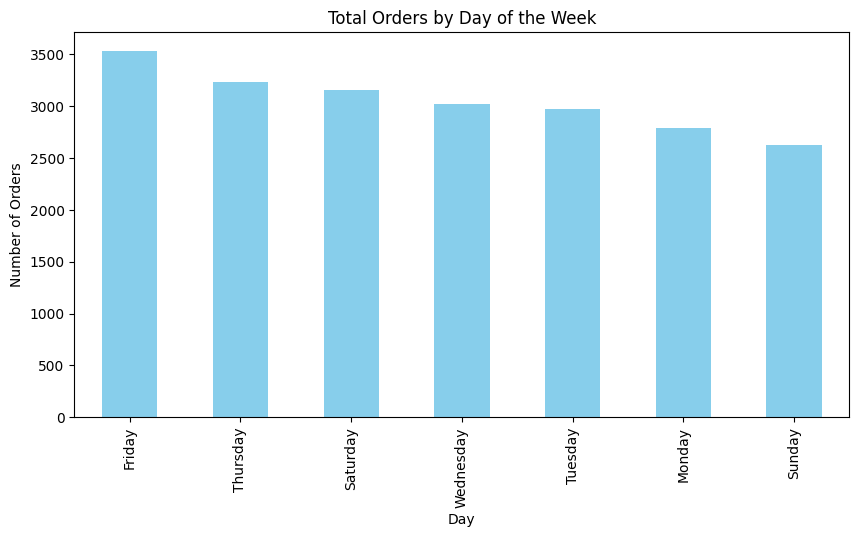

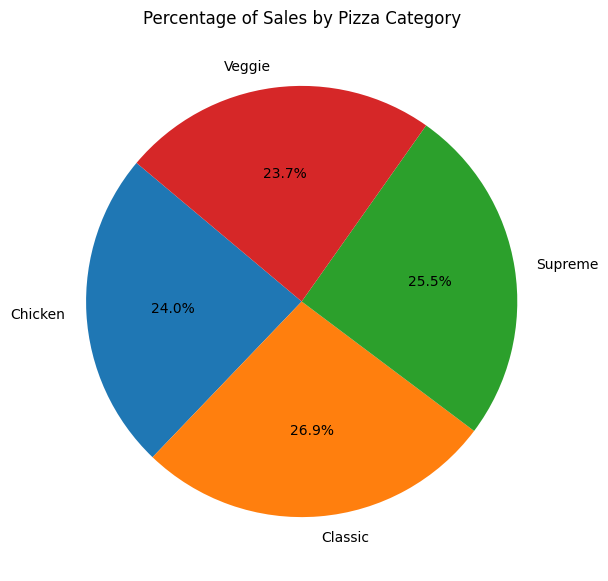

In [ ]:
import matplotlib.pyplot as plt

# 1. Bar Chart: Busiest Days
daily_orders.plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title('Total Orders by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.show()

# 2. Pie Chart: Revenue by Category
category_revenue.plot(kind='pie', autopct='%1.1f%%', figsize=(7,7), startangle=140)
plt.title('Percentage of Sales by Pizza Category')
plt.ylabel('') # Removes the vertical label for a cleaner look
plt.show()